# Proyecto Ruido UNAL- Proyecto 2

**Presentador por:**
---

---

- **Juan Esteban Cepeda Baena.**
- Estudiante de Ciencias de la Computación y Administración de Empresas de la Universidad Nacional de Colombia.
- Email: jecepedab@unal.edu.co / juancepeda.gestion@gmail.com
- Google Site: https://sites.google.com/view/juancepeda/

---

- **Juan Daniel Gomez Ríos.**
- Estudiante de Ciencias de la Computación de la Universidad Nacional de Colombia.
- Email: judgomezri@unal.edu.co
- Google Site: 

---

- **Carlos Ernesto Isaza Carvajal.**
- Estudiante de Matemáticas de la Universidad Nacional de Colombia.
- Email: ceisazac@unal.edu.co
- Google Site:

---

- **Tania Valentina Delgado Castillo.**
- Estudiante de Ciencias de la Computación de la Universidad Nacional de Colombia.
- Email: tvcastillod@unal.edu.co
- Google Site:

### 1. Introducción.

---

La construcción de mapas de ruido juega un papel fundamental para la adopción de planes de acción para prevenir y reducir el ruido ambiental, en especial, cuando los niveles de exposición pueden ser nocivos en la salud humana; generando enfermedades (producidas por el estrés y la ansiedad) y problemas auditivos (pérdida de la capacidad auditiva debido a los altos niveles de exposición al ruido), lo que resulta en una disminución de la calidad de vida de las personas. Este fenómeno no sólo afecta a los seres humanos, como lo demuestra el estudio realizado por la Asociación Bogotana de Ornitología en 2012, en el cual señala una grave disminución de las aves copetonas en la ciudad de Bogotá debido a que los altos niveles de ruido no le permitía a las hembras escuchar el canto de los machos (el cual utilizan los machos para atraer a las hembras) (El Tiempo, 13 de febrero 2012).

El presente trabajo aborda la conceptualización, metodología y desarrollo de una serie de mapas de ruido de la Universidad Nacional de Colombia: Sede Bogotá, en donde se identifican las zonas con mayor ruido en el campus, dando cabida al desarrollo de futuros planes de acción para su control y disminución. Lo anterior resulta de gran importancia, pues autores como Guerrero (1992) enfatizan sobre los efectos negativos del ruido sobre la concentración, la cual es un proceso psíquico fundamental para el proceso de aprendizaje. Adicionalmente, se presenta un algorítmo de aprendizaje de máquina (el cual utiliza el Modelo K-vecinos más cercanos), capaz de distinguir entre ruido y no-ruido, lo cual permite categorizar de una manera más acertada las muestras de sonido tomadas en la universidad.

### 2. Estado del Arte.

---
En los últimos años se han llevado a cabo numerosos proyectos alrededor de esta problemática, en particular, se tomó como referencia el proyecto [Sounds Of New York City (SONYC)](https://wp.nyu.edu/sonyc/), el cual inició en 2015 y actualmente sigue en desarrollo. El objetivo del proyecto es comprender el comportamiento del ruido en diversos ambientes de la ciudad de Nueva York con el fin de identificar y mitigar las fuentes de contaminación acústica, esto con ayuda de una red distribuida de sensores y la participación de ciudadanos para generar informes de ruido.

Algunos aspectos importantes que se desarrollan en ese proyecto son: el desarrollo de una plataforma de detección inteligente que permite el monitoreo en tiempo real del ruido, una descripción precisa de la clasificación de sonidos y el análisis de ruido a gran escala por medio de redes neuronales. Con la información obtenida se busca generar medidas de mitigación de ruido, además de intervención en zonas de manera estratégica. Finalmente, elementos como el aprendizaje automático, visualización y análisis de datos fueron importantes para el desarrollo del proyecto.

Por otro lado, en Colombia se realizó una propuesta de [Diseño de red de vigilancia de ruido en los municipios del área metropolitana del Valle de Aburrá](http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S1692-33242009000100003). Esta propuesta fue hecha con el objetivo de evaluar zonas críticas que presentan altos niveles de ruido y perjudican ciertas zonas residenciales. Adicionalmente se contaba con fuentes de información como estudios previos y mapas acústicos suministrados por los planes de ordenamiento territorial (POT) del área metropolitana. Ahora bien: también es importante mencionar que la Secretaría Distrital de Ambiente en Bogotá cuenta con un sistema de monitoreo de ruido de las operaciones aéreas del Aeropuerto Internacional El Dorado. El [Sistema Automático de Monitoreo de Ruido (GEMS Global Environment Management System)](http://ambientebogota.gov.co/ruido) cuenta con tres estaciones ubicadas en diferentes puntos de la ciudad y los datos recolectados corresponden a registros de los niveles de presión sonora(dB), datos de radar y meteorológicos.

<img src="https://s18798.pcdn.co/sonyc/wp-content/uploads/sites/2188/2015/06/CPS_diagram-1024x685.png"
 width="350" height = "230">
<center><i>Figura X. Proyecto SONYC. Recuperado de: <a href = "https://wp.nyu.edu/sonyc/">Sonyc: Sounds of New York City</a></i></center>

### 3. Materiales y Métodos.

---
A continuación, se describe la metodología de sensado, almacenamiento, procesamiento y análisis de los datos que se llevó cabo para construir una serie de mapas de ruido de la Universidad Nacional de Colombia: Sede Bogotá. Adicionalmente, se presenta el método que se utilizó para desarrollar y entrenar un agente de inteligencia artificial capaz de clasificar un audio entre ruido y no-ruido.

**A. Sensado**: Este proceso consistió en definir la metodología y procedimiento para llevar a cabo las grabaciones de audio junto con el registro de las ubicaciones GPS. A continuación, se describe detalladamente cada aspecto del sensado:

***I) Aplicaciones para tomar los registros***: Para realizar las grabaciones de audio y registrar las ubicaciones GPS del recorrido, se utilizaron las siguientes aplicaciones:

1.	[GPS Logger](https://play.google.com/store/apps/details?id=com.mendhak.gpslogger&hl=es_419): Esta aplicación permite realizar registros de la ubicación GPS en distintos formatos (csv, GeoJson, etc), el cual, luego puede ser subido a google drive u otras aplicaciones de almacenamiento. Su principal ventaja es que sigue ejecutándose aun cuando el celular se encuentra bloqueado, i.e, corre en el background. Se guardaron las localizaciones en formato CSV, con un intervalo de registro de 15 segundos (toma de muestras).

2.	 [Voice Recorder](https://play.google.com/store/apps/details?id=com.splendapps.vox&hl=en_US):
Esta aplicación permite realizar grabaciones del ambiente. Además, permite compartir los archivos de audio por medio de Google Drive, así como correo, whatsapp, etc. Los archivos de audio se guardaron en formato WAV.

***II) Proceso de grabación***: Con el objetivo de estandarizar el nombre de los archivos de audio y de las ubicaciones GPS, se definió el siguiente formato: 

1. Nombre Archivos GPS (i.e, los archivos CSV): IDCelular-No.deGrabacion.
2. Nombre Archivos de audio: IDCelular-No.deGrabacion-Día-HoraExacta

En donde, 

a. IDCelular: Es un número de identificación único para cada uno de los celulares. Por ejemplo, IDCelular: 21. Así, dado el código de un archivo, se sabe qué persona lo tomó.

b. No.deGrabación: Como su nombre lo indica, corresponde al número de grabación. Por ejemplo: No.deGrabación: 2.

c. Día: El formato que se utilizó para registrar la fecha de los archivos fue Día/Mes, a manera de ejemplo, se registrará como 0710 (i.e 7/10 [7 de Octubre]; si el día era menor a 10, se colocaba un 0 al inicio, es decir, si el día es 7, se registraba como 07). Esto con el fin de analizar el comportamiento del mapa de ruido a lo largo de la semana.

d. HoraExacta: Corresponde a la hora exacta en que se graba el audio en horas militares. A manera de ejemplo, considere HoraExacta: 0957 (i.e 9:57), ó HoraExacta: 2353 (i.e 23:53). 

<img src="https://gadgetsmalta.com/wp-content/uploads/2018/07/5_Best_Voice_Recording_Apps_For_Android_TechnoidHub.png" width="350" height = "230">
<center><i>Figura X. Grabación de Audios. Recuperado de: <a href = "https://gadgetsmalta.com">Gadgetsmalta</a></i></center>

***III) Proceso de Almacenamiento***: Los archivos CSV (GPS) y los archivos de audio se cargaron a la siguiente dirección de Google Drive: https://drive.google.com/drive/folders/1uabmwSJh3pQK10Y7Hm2TrlTVu6xsI6Hi?usp=sharing.

***IV) Estandarización de audios***: Inicialmente, se tuvo la preocupación de que los distintos tipos de hardware del micrófono integrados a los celulares pudieran generar una distorsión en la comparabilidad de las muestras obtenidas, puesto a que existía la posibilidad de que algunos celulares pudiesen captar una mayor cantidad de ruido que otros. Para solucionar este problema, se procedió a grabar el mismo sonido ambiente simultáneamente con los cuatro dispositivos utilizados para realizar los mapas de ruido. Lo anterior, con el objetivo de calcular el nivel de ruido captado por cada celular, y definir planes de acción de acuerdo con las diferencias que pudiesen existir. Este proceso se discute más adelanta en la sección "Compensación".

**B. Procesamiento de Datos**: En esta etapa se definieron las reglas para asociar cada uno de los archivos de audio con su respectivo recorrido (archivo GPS): Los archivos que contienen las ubicaciones GPS consisten en 3 columnas, a saber: Fecha, Latitud y Longitud. Así, lo que se quería, era asociar a cada fila del registro GPS, dos columnas adicionales: Ruido y Tipo de Ruido. Una vez construidas las tablas con las columnas adicionales, se procedía a guardarlas como archivos CSV en la carpeta "Resultados". Este algoritmo se describe detalladamente en la sección "Procesamiento de Datos".

**C. Clasificación de audios**: Para abordar el problema de clasificación de audios (es decir, reconocer si un audio es un SONIDO o es un RUIDO), se utilizó un clasificador (k-vecinos más cercanos), y un regresor. A continuación se detalla cada uno de ellos: 

***K-vecinos más cercanos***: Para la clasificación de audios se utilizó la "coherencia" como la medida estadística base para el desarrollo del clasificador. La coherencia es una medida estadística utilizada para examinar la relación entre dos señales o dos conjuntos de datos. Adicionalmente, se emplea usualmente para estimar la transfencia de poder entre el input y el ouput de un sistema lineal. Así, la coherencia entre dos señales $x(t)$ y $y(t)$ es una función definida como: $C_{xy}(f) = {\frac{{\mid{ G_{xy}(f) }\mid}^2}{G_{xx}(f)G_{yy}(f)}}$, donde $G_{xy}(f)$ es la densidad espectral cruzada entre $x$ y $y$ y $G_{xx}(f)$ y $G_{yy}(f)$ es la densidad autoespectral de $x$ y $y$ respectivamente. Así, se utilizó el método K-vecinos más cercanos o en inglés "k-nearest neighbors (k-nn)", en donde los objetos a comparar son las señales, y la distancia entre ellas se definió como la "coherencia" entre ellas y un nuevo input. Este modelo, a partir de una estimación basada en un conjunto de entrenamiento, permite calcular la función de densidad $F(x/Cj)$ de las predictoras $x$ por cada clase $Cj$ , es decir, estima el valor de la función de densidad de probabilidad de que un elemento $x$ pertenezca a la clase $Cj$.

<img src="https://www.houseofbots.com/images/news/2542/cover.png" width="400" height = "230">
<center><i>Figura X. Modelo K-vecinos más cercanos. Recuperado de: <a href = "https://houseofbots.com">House of Bots</a></i></center>


***Regresión Logística:*** También se usó un modelo logístico de clasificación de ruido con el fin de tener mayor cantidad de herramientas con el fin de adoptar la que muestre mejores resultados. La regresión logística es un modelo de análisis de regresión que busca hallar una relación entre variables con el fin de predecir la categoría de una variable nueva, en este caso "ruido" o "no ruido" usando los datos de amplitud.
<img src="https://conceptosclaros.com/wp-content/uploads/2018/02/modelo-matemiatico-estructura-1024x826.jpg" width="400" height = "230">
<center><i>Figura Y. Interpretación Regresión Logística. Recuperado de: <a href = "https://conceptosclaros.com"> Conceptos Claros</a></i></center>



**D. Generación de Mapas de Ruido**: Con base en las tablas generadas en la etapa de Procesamiento de Datos, se utilizó la librería Folium para generar los mapas de ruido asociados a las tablas. En particular, el plugin utilizado fue "HeatMap", el cual recibe como parámetro una serie de 3-tuplas, las cuales están constituídas por: (Latitud, Longitud, Peso), en donde el peso corresponde al nivel de ruido registrado en la posición GPS. Adicionalmente, con base en los resultados de los datos recolectados, se realizó una serie de simulaciones de mapas de ruido de la universidad, las cuales corresponden a los niveles de ruidos que se generan de lunes a viernes, en los horarios: 7:00 a 9:00, 9:00 a 11:00, 11:00 a 13:00, 14:00 a 16:00 y 16:00 a 18:00. Lo anterior, se presenta más adelante.

<img src="https://miro.medium.com/max/3652/1*_mwJWphhLKix_Yh-SySboQ.png" width="350" height = "230">
<center><i>Figura X. Grabación de Audios. Recuperado de: <a href = "https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf">Spatial Visualizations and Anlysis in Python with Folium</a></i></center>



Las herramientas computacionales o librerías utilizadas para el desarrollo del proyecto fueron: 1) Numpy, 2) Pandas, 3) Folium, 4) Math, entre otras. A continuación se explica qué son y cómo fueron utilizadas:

**1. Numpy**: es una de las librerías más importante de Python, encargada de incorporar funcionalidades de carácter matemático y vectorial. 

**2. Pandas**: es una extensión de Numpy desarrollada para la manipulación y análisis de datos en Python. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. Pandas se utilizó para construir las tablas ruido.

**3. Folium**: es una librería que potencia la gestión y manipulación de datos en Python, permitiendo su visualización a través de un "Leaflet map". Esta API se utilizó para generar los mapas de ruido de la Universidad Nacional de Colombia: Sede Bogotá.

**4. Math**: corresponde a una librería de Python que provee acceso a las funciones matemáticas definidas por el estándar de C. Esta librería se utilizó para calcular las distancias entre dos partículas antes de una colisión, y para calcular el ángulo de incidencia de las mismas al momento de su encuentro. Entre las funciones utilizadas se encuentra: sqrt, degrees, asin, radians, entre otros.

### 4. Resultados.

---

A continuación, se presenta el código del programa, el cual se distribuye en cuatro secciones, a saber: Compensación, Clasificación de audios, Procesamiento de Datos, Análisis de Datos y Simulaciones. En cada una de ellas, se explica el objetivo de la sección, y los algoritmos desarrollados para resolver cada problema.

In [12]:
# Import libraries.
import os
import numpy as np
import math
import pandas as pd
import datetime
import random
import calendar
import time

import folium
from folium import plugins
from folium.plugins import HeatMap

import scipy
import scipy.io.wavfile
from scipy import signal
from playsound import playsound

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Import sklearn library.
import IPython
from scipy import fftpack
import csv
import os
import statistics as stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb

**4.1 Compensación.**

---
Como se mencionó previamente, el objetivo de esta sección era determinar una plan de acción para estandarizar los niveles de ruido captados por cada celular. Así, para solucionar este problema, se procedió a grabar el mismo sonido ambiente simultáneamente con los cuatro dispositivos utilizados para llevar a cabo el sensado. Lo anterior, con el objetivo de calcular el nivel de ruido captado por cada celular. A continuación, se presentan los resultados de este ejercicio y se explican las funciones utilizadas.


$4.1.1. getMean(array)$: Esta función recibe como parámetro una lista de valores, y retorna el promedio de los valores contenidos en ella.

$4.1.2. getDB(audio_{signal})$: Esta función recibe como parámetro una señal de audio, sobre la cual se calculan los decibeles asociados al sonido. Para ello, primero se normaliza la señal, dividiendo todos los valores contenidos en la lista entre el máximo valor de la lista. Paso seguido, se aplica la función $f(x) = abs(20 * log_{10}(x))$ sobre los valores computados, i.e, los decibeles. Finalmente, se retorna una lista de decibeles.

$4.1.3. getAurhot(id)$: Esta función recibe por parámetro un número (del 0 al 3), y retorna el nombre de uno de los integrantes, dependiendo de la identificación de su celular.

In [14]:
# Mean function.
def getMean(lista):
    suma = 0
    for i in lista: 
        suma += i
    return suma/len(lista)

# Convert amplitude to db.
def getDB(input_signal):
    INCREASE = 35

    if(max(input_signal) > abs(min(input_signal))): 
        max_amplitude = max(input_signal)
    else: 
        max_amplitude = abs(min(input_signal))
    input_signal_normalize = abs(input_signal / max_amplitude)

    db = list()
    for i in input_signal_normalize:
        if i != 0: 
            db.append(abs(20 * math.log(abs(i), 10)) + INCREASE)
        else:
            db.append(0)
    return db

# Get audio-gps author.
def getAuthor(id):
    if id == 2: return "Juan Esteban"
    elif id == 3: return "Carlos"
    elif id == 4: return "Tania"
    elif id == 1: return "Daniel"

In [15]:
# Set path to files.
pathFile = "./Pruebas Compensacion"
sound_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        sound_files.append(entry.name)
print(sound_files)

print("Resultados: ")
# Load audio file.
for i in range(0, len(sound_files)):
    (sample_rate, input_signal) = scipy.io.wavfile.read(pathFile + "/" + sound_files[i])
    time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)   
    audio_duration_minutes = time_array[-1] / 60
    try: 
        input_signal = input_signal[:,0]
    except: 
        pass
    print(getAuthor(i + 1), "Decibels :", getMean(getDB(input_signal)))

['Prueba-2.wav', 'prueba-3.wav', 'prueba-4.wav']
Resultados: 
Daniel Decibels : 58.08575640203698
Juan Esteban Decibels : 57.88565204826785
Carlos Decibels : 58.39429498705403


Como se observa, los niveles de ruido captados por cada celular son muy similares, por lo cual se descartó tener que definir un plan de acción para estandarizar el micrófono de los dispositivos móviles. Con esto en mente, procedemos a trabajar en la clasificación de sonidos.

**4.2 Clasificación de Audios con el modelo K-vecinos más cercanos.**

---
Como se presentó previamente, el objetivo de esta sección es construir un clasificador que distinga un sonido de un ruido. Lo anterior, con base en una medida estadística utilizada en el procesamiento de señales conocida como la "coherencia" ($𝐶{xy}(𝑓), donde $x$ y $y$ son señales)$. A continuación, se explica el funcionamiento de la clase $NearestNeighbors$:

4.2.1 $NearestNeighbors()$: Para el desarrollo del clasificador, se partió de la construcción de una clase. Para inicializar esta clase, es necesario indicar tres parámetros, a saber: $X$, $Y$ y $neighbors$, donde $X$ corresponde a una lista con el nombre de los audios, $Y$ corresponde a una lista con las categorías de los audios contenidos en $X$ y $neighbors$ es la cantidad de los $k$-vecinos más cercanos a encontrar por el clasificador.

4.2.1.1 $init(X, y, neighbors)$: Esta función, se encarga de asignar los valores de entrada previamente enunciados, a variables locales de la clase.

4.2.1.2 $processSound(sound, sound_{class})$: Este método recibe por parámetro el nombre de un archivo de audio y la clase del audio (i.e corresponde a un string que le permite determinar al clasificador si el nombre del archivo de audio pasado por parámetro pertenece al conjunto de entrenamiento o al conjunto de prueba, lo anterior, con la finalidad de construir correctamente la ruta al archivo). Paso seguido, con la librería $scipy$, se carga el audio asociado a la ruta, y posteriormente, se transforma la frecuencia de la señal a 4000Hz, de tal manera que todos los audios queden con la misma frecuencia de muestreo para facilitar su comparación

4.2.1.3 $predict(sound)$: Esta función recibe por parámetro el nombre de un archivo de audio. Paso seguido, utiliza la función $processSound$ para cargar el archivo y cargar cada uno de los audios contenidos en el conjunto de entrenamiento. De esta manera, va calculando par a par la coherencia entre el input de la función $predict$ y cada uno de los archivos de entrenamiento. Una vez calculada la coherencia, procede a calcular el promedio de esta medida, la cual se va a definir con la distancia entre dichos objetos. De esta manera, la función termina por construir una lista de valores que contiene cada una de las distancias entre cada objeto del conjunto de entrenamiento y el input, sobre la cual se computan las $k$-distancias más cercanas, para luego retornar un array de dos posiciones indicando la probabilidad de que pertenezca a la clase "RUIDO" y a la clase "SONIDO".

4.2.1.4 $plotResults(categories_{array})$: Esta función recibe por parámetro un array de dos posiciones cuyos valores corresponden a la probabilidad de que un cierto sonido pertenezca a la clase "RUIDO" y a la clase "SONIDO". A continuación, procede a imprimir por pantalla una gráfica de barras con esta información.

4.2.2 $setLabel(filename)$: Este método recibe por parámetro el nombre de un archivo de audio. Si el nombre del archivo contiene la palabra "ruido", la función retorna 0; en caso contrario, retorna 1.


In [16]:
class NearestNeighbors():
    
    # Load data.
    def __init__(self, X, y, neighbors = 5):
        self.sounds = X
        self.labels = y
        self.neighbors = neighbors
        #print("Classifier initialize!")
        
    def predict(self, sound):
        
        categories = [0, 0]
        signal_to_predict = self.processSound(sound, "test")
        similar_vector = list()
        
        # Compute audio similarity.
        for s in self.sounds:
            training_sound = self.processSound(s, "training")
            fs = 10e3
            f, Cxy = scipy.signal.coherence(signal_to_predict, training_sound, fs, nperseg=1024)
            similar_vector.append(Cxy.mean())
            training_sound = None
            #print(s, Cxy.mean())
            
            f = None
            Cxy = None
            
        # Select K-nearest neigbors.
        temp = similar_vector.copy()
        nearest_neighbors = list()
        contador = 0
        
        while(contador < self.neighbors):
            element = min(temp)
            nearest_neighbors.append(element)
            temp.remove(element)
            contador += 1
        
        temp = list()
            
        for k in nearest_neighbors:
            
            index = similar_vector.index(k)
            if labels[index] == 0: 
                categories[0] += 1
            else: 
                categories[1] += 1
                
        for c in range(0, len(categories)):
            categories[c] = categories[c] / self.neighbors #len(self.sounds)
        
        #print("Nearest Neighbors: ")
        #print(nearest_neighbors)
            
        temp = list()
        nearest_neighbors = list()
        contador = 0
        signal_to_predict = list()
        similar_vector = list()
        
        return categories
    
    # Process Sound.
    def processSound(self, sound, sound_type):
        
        # Load audio.
        if(sound_type == "training"): pathFile =  "./Audios/training_set/" + str(sound)
        else: pathFile =  "./Audios/test_set/" + str(sound)
        
        (sample_rate, input_signal) = scipy.io.wavfile.read(pathFile, mmap = True)

        # Convert to mono.
        try:
            input_signal = input_signal[:,0]
        except: 
            pass
    
        # Calculate time array (max 10 seconds).
        #time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)   
        #audio_duration_minutes = time_array[-1] / 60

        # Print audio duration.
        #print("Sound ready! Duration in minutes: ", audio_duration_minutes)

        # Convert input signal to 4000 hz.
        input_signal_4000hz = [input_signal[i] for i in range(0, len(input_signal), sample_rate//4000)]
        
        # Return process audio.
        #print(len(input_signal_4000hz))
        return input_signal_4000hz
        
    # Get Euclidean Distance between two points.
    """
    def getEuclideanDistance(self, p1, p2):
        distance = 0
        for i in range(0, len(p1)):
            distance += (p1[i] - p2[i])**2
        return math.sqrt(distance)
    """
    
    # Plot results. 
    def plotResults(self, res):
        
        if res[0] < res[1]: print("Audio classified as: NOISE.")
        elif res[1] < res[0]: print("Audio classified as: SOUND.")
        
        plt.bar(["Sound", "Noise"], res, width = 0.5, hatch = "/", color = "#33C1FF", edgecolor = "black")
        plt.ylabel("Probability")
        plt.title("Audio Classification")
        plt.ylim(0, 1)
        plt.show()

In [17]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
def setLabel(file_name):
    if(file_name.find("ruido")) >= 0: return 0
    else: return 1

**Entrenamiento del Clasificador.**

---
A continuación, se cargan los datos de entrenamiento del clasificador, y de acuerdo al nombre del archivo, se le asigna su categoría o "label" correspondiente.

In [18]:
# Load Training data.
sound_files = list()
with os.scandir("./Audios/training_set") as entries:
    for entry in entries:
        sound_files.append(entry.name)

labels = list()
for s in sound_files:
    labels.append(setLabel(s))
    
print("Noise Label: 0")
print("Not-Noise Label: 1")
print("")
print("Training Set:")
print("Audio", "          Label")
print("")
for s in sound_files:
    print(s, " => " + str(labels[sound_files.index(s)]))
print("")


Noise Label: 0
Not-Noise Label: 1

Training Set:
Audio           Label

ruido_1.wav  => 0
ruido_10.wav  => 0
ruido_2.wav  => 0
ruido_3.wav  => 0
ruido_4.wav  => 0
ruido_5.wav  => 0
ruido_6.wav  => 0
ruido_7.wav  => 0
ruido_8.wav  => 0
ruido_9.wav  => 0
sonido_1.wav  => 1
sonido_10.wav  => 1
sonido_2.wav  => 1
sonido_3.wav  => 1
sonido_4.wav  => 1
sonido_5.wav  => 1
sonido_6.wav  => 1
sonido_7.wav  => 1
sonido_8.wav  => 1
sonido_9.wav  => 1



**Testeo y Optimización del Clasificador.**

---
En esta subsección, se carga el conjunto de datos de prueba, y se procede a computar el mejor valor de $k$, en donde $k$ corresponde a la cantidad de vecinos más cercanos que utilizará el clasificiador. 

In [19]:
# Load Test data.
test_data = list()
with os.scandir("./Audios/test_set") as entries:
    for entry in entries:
        test_data.append(entry.name)

In [20]:
print("Test Data")
print("")
for s in test_data:
    print(s)

Test Data

ruido_11.wav
ruido_12.wav
ruido_13.wav
ruido_14.wav
ruido_15.wav
sonido_11.wav
sonido_12.wav
sonido_13.wav
sonido_14.wav
sonido_15.wav


In [186]:
# Optimizing the model.
for k in range(3, 10):

    # Initialize the model.
    model = NearestNeighbors(sound_files, labels, neighbors = k)

    # Predict sound category of test data and compute confusion matrix.
    confusion_matrix = [[0, 0], [0, 0]]
    for sound in test_data:   
        if sound.find("ruido"):
            actual_label = 0
        else: 
            actual_label = 1
        res = model.predict(sound)
        predicted_label = res.index(max(res))
        confusion_matrix[actual_label][predicted_label] += 1

    # Compute accuracy rate.
    accuracy_rate = (confusion_matrix[0][0] + confusion_matrix[1][1]) 
    accuracy_rate /= len(test_data)

    # Compute Error Rate.
    error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0])
    error_rate /= len(test_data)

    # Sensitivity.
    sensitivity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

    # Specificity
    specificity = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])

    print("")
    print("Number of Neighbors: ", k)
    print("Accuracy Rate: ", accuracy_rate)
    print("Error Rate: ", error_rate)
    print("Sensitivty: ", round(sensitivity, 3))
    print("Specificity: ",  round(specificity, 3))
    print("---")


Number of Neighbors:  3
Accuracy Rate:  0.4
Error Rate:  0.6
Sensitivty:  0.429
Specificity:  0.333
---

Number of Neighbors:  4
Accuracy Rate:  0.4
Error Rate:  0.6
Sensitivty:  0.429
Specificity:  0.333
---

Number of Neighbors:  5
Accuracy Rate:  0.6
Error Rate:  0.4
Sensitivty:  0.6
Specificity:  0.6
---

Number of Neighbors:  6
Accuracy Rate:  0.7
Error Rate:  0.3
Sensitivty:  0.625
Specificity:  1.0
---

Number of Neighbors:  7
Accuracy Rate:  0.5
Error Rate:  0.5
Sensitivty:  0.5
Specificity:  0.5
---

Number of Neighbors:  8
Accuracy Rate:  0.7
Error Rate:  0.3
Sensitivty:  0.625
Specificity:  1.0
---

Number of Neighbors:  9
Accuracy Rate:  0.8
Error Rate:  0.2
Sensitivty:  0.714
Specificity:  1.0
---


Así, por la optimización previa, se determinó utilizar nueve vecinos ($k = 9$) para inicializar el modelo de clasificación.

**Prueba interactiva.**

---
Antes de ejecutar el código de la siguiente casilla, recomendamos ponerse audífonos; el objetivo de esta pequeña sección, es que el lector escuche cada uno de los audios del conjunto de prueba, y en tiempo real pueda observar cuál es la categoría que le asigna el clasificador.

-----
File name:  ruido_11.wav
Audio classified as: NOISE.


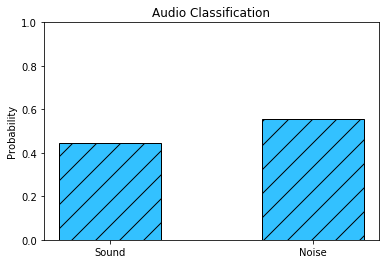

-----
-----
File name:  ruido_12.wav
Audio classified as: SOUND.


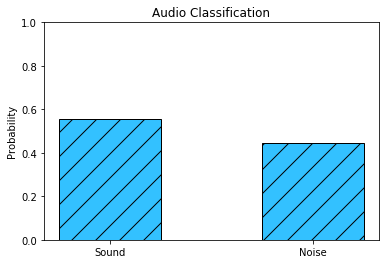

-----
-----
File name:  ruido_13.wav
Audio classified as: NOISE.


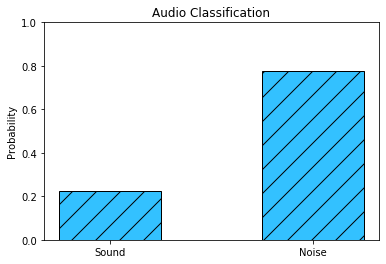

-----
-----
File name:  ruido_14.wav
Audio classified as: NOISE.


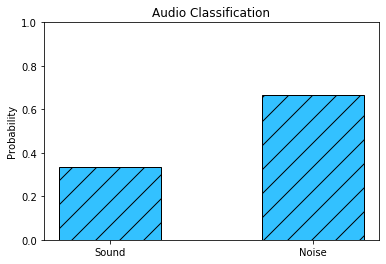

-----
-----
File name:  ruido_15.wav
Audio classified as: SOUND.


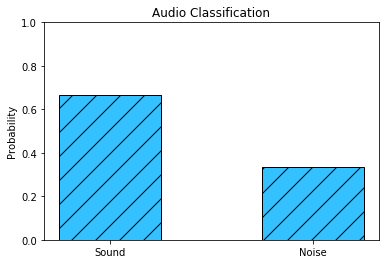

-----
-----
File name:  sonido_11.wav
Audio classified as: SOUND.


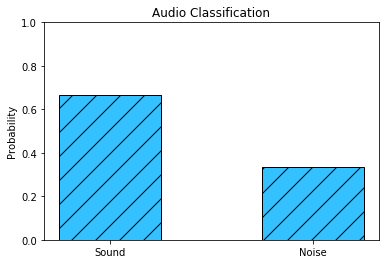

-----
-----
File name:  sonido_12.wav
Audio classified as: SOUND.


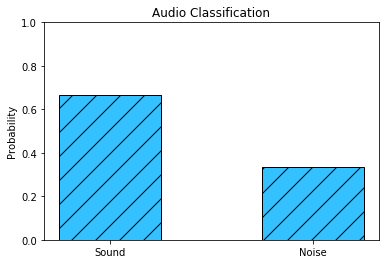

-----
-----
File name:  sonido_13.wav
Audio classified as: SOUND.


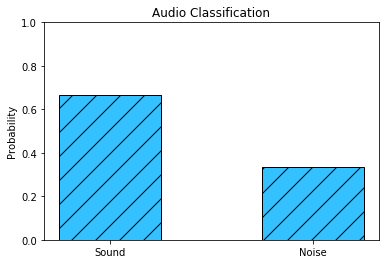

-----
-----
File name:  sonido_14.wav
Audio classified as: SOUND.


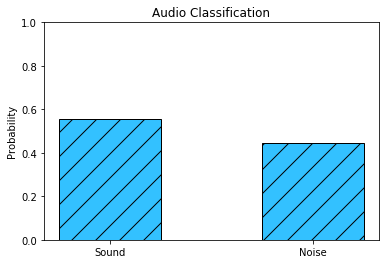

-----
-----
File name:  sonido_15.wav
Audio classified as: SOUND.


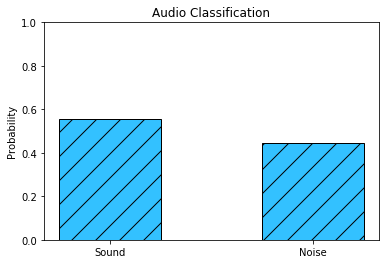

-----

MODEL STATS:

Number of Neighbors:  9
Accuracy Rate:  0.8
Error Rate:  0.2
Sensitivity:  0.714
Specificity:  1.0


In [21]:
# Best parameter.
k = 9

# Initialize the model.
model = NearestNeighbors(sound_files, labels, neighbors = k)

# Predict sound category of test data and compute confusion matrix.
confusion_matrix = [[0, 0], [0, 0]]
for sound in test_data:   
    print("-----")
    print("File name: ", sound)
    
    playsound("./Audios/test_set/" + sound)
    if sound.find("ruido"):
        actual_label = 0
    else: 
        actual_label = 1
    res = model.predict(sound)
    model.plotResults(res)
    print("-----")
    predicted_label = res.index(max(res))
    confusion_matrix[actual_label][predicted_label] += 1
    time.sleep(1.5)

# Compute accuracy rate.
accuracy_rate = (confusion_matrix[0][0] + confusion_matrix[1][1]) 
accuracy_rate /= len(test_data)

# Compute Error Rate.
error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0])
error_rate /= len(test_data)

# Sensitivity.
sensitivity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

# Specificity
specificity = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])

print("")
print("MODEL STATS:")
print("")

print("Number of Neighbors: ", k)
print("Accuracy Rate: ", accuracy_rate)
print("Error Rate: ", error_rate)
print("Sensitivity: ", round(sensitivity, 3))
print("Specificity: ",  round(specificity, 3))

Por último, es importante señalar que el clasificador de sonidos y ruidos desarrollado en esta sección, no se utilizó al momento de procesar los audios registrados; lo anterior, se debe a que la baja calidad de los audios no permitía una correcta clasificación de los mismos; resultando en que todos eran clasificados como ruido.

**4.3. Clasificación de Datos con Regresión Logística**

---
Debido a las limitaciones que tiene el modelo k-vecinos, construimos el siguiente clasificador de audio con el método de regresión logística. La dinámica fue grabar varios audios que correspondieran a "ruido" y varios otros que correspondieran a "no ruido" esperando que las nuevas entradas de audio fueran clasificadas en estas dos categorías. Para ello usaremos los datos del valor máximo y mínimo de la amplitud así como su promedio y desviación estándar.

**IMPORTANTE: Esta sección no se puede ejecutar debido a que los archivos de audio y GPS que fueron tomados, se decidieron remover de esta carpeta debido a su peso (> 1.5 GB). Si desea consultar los archivos utilizados, estos se encuentran disponible en el siguiente enlace: https://drive.google.com/drive/folders/1uabmwSJh3pQK10Y7Hm2TrlTVu6xsI6Hi?usp=sharing. Adicionalmente, en caso en que quiera ver el funcionamiento del clasificador, puede correr el código del siguiente notebook: https://colab.research.google.com/drive/1CfhLau-orer5v4V-bEHasNKhdTqwLJgJ#scrollTo=MpxjPDcUuxKG**.

In [ ]:
pathFile =  "/content/drive/My Drive/NoiseProject/Test/Test con 3-8"
sound_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        if(entry.name.find("wav") > 0):
            sound_files.append(entry.name)
print(sound_files)

mini=list()
maxi=list()
prom=list()
dsv=list()
var=list()
clase = list()

# Grafica las muestras y crea los vectores con las estadisticas.
for i in sound_files:  
    (rate, audio) = scipy.io.wavfile.read('/content/drive/My Drive/NoiseProject/Test/Test con 3-8/'+i)  
    if(i[-5]=='3'):
        audio=audio[:,0] #Audios en esterios
    time_array = np.arange(0, len(audio)/rate, 1/rate)
    setup_graph(title= i, x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
    _ = plt.plot(time_array, audio)

    mini.append(audio.min())
    maxi.append(audio.max())
    prom.append(audio.mean())
    dsv.append(audio.std())
    if(i[0:5]=='ruido'): 
        clase.append(1)
    else: clase.append(0)

In [ ]:
# Creación de csv con estadísticas.
dicc = {'clase': clase,'max': maxi, 'min':mini,'prom':prom, 'dsv':dsv}
df1 = pd.DataFrame(dicc)
df1.to_csv('/content/drive/My Drive/NoiseProject/Test/Test con 3-8/data2.csv',  index=False)

# Apertura de CVS con estadísticas.
dataframe = pd.read_csv(r"/content/drive/My Drive/NoiseProject/Test/Test con 3-8/data2.csv")
dataframe.head()

In [ ]:
# Creación de vector con estadísticas y vector con clasificación.
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

In [ ]:
# Creación de datos de entrenamiento y de test.
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

#creacion del modelo
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)

In [ ]:
# Ajuste del modelo.
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score( model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

# Validación del modelo.
predictions = model.predict(X)
print(accuracy_score(predictions,y ))

# Estadisticas de la validación del modelo.
print(classification_report(y, predictions))

**4.3.1 Procesamiento de Datos sin Clasificación de Audios.**

---
Como se indicó previamente, el objetivo de esta sección es definir las reglas para asociar cada uno de los archivos de audio con su respectivo recorrido (archivo GPS): A continuación se describe cada una de las funciones, y el funcionamiento general del algoritmo. 
 
4.3.1. $noise_{levels}(decibels):$ Esta función recibe por parámetro un número real, que corresponde a los decibeles asociados a un determinado sonido. Paso seguido, dependiendo del nivel de ruido, la función retorna un string indicando el tipo de sonido al que corresponde dicho nivel de ruido.

4.3.2. $convertToDatetime(date):$ Este método recibe por parámetro un string que contiene una fecha. A continuación, retorna un $datetime$ en el formato '%Y-%m-%d %H:%M:%S'.

4.3.3. $addSecondsColumn(dataframe):$ Esta función recibe por parámetro un dataframe que contiene tres columnas, a saber: time (Tiempo), lat (Latitud) y lon (Longitud). A continuación, procede a convertir los string de fechas de la columna Tiempo a un $datetime$ en el formato '%Y-%m-%d %H:%M:%S', para luego, calcular la diferencia de tiempos par a par de cada fecha registrada. Finalmente, se retorna un nuevo dataframe, constituído por cuatro columnas: time, lat, lon, seconds, en donde los valores de la columna time son $datetimes$ y los vaores de la columna seconds corresponde a la diferencia de segundos par a par de cada fecha registrada.

4.3.4. $getNoiseDataframe(df, time_{array}, input_{signal})$: Esta función recibe por parámetro un dataframe, una lista de tiempo y una señal. A continuación, la función procede a computar la mayor amplitud registrada en el arreglo $input_{signal}$, para luego, al momento de iterar sobre las filas del dataframe, normalizar los valores asociados a los valores extraídos del $input_signal$. Una vez extraído y normalizado dicho valor, se calculaba su nivel de decibeles. Finalmente, se retorna el dataframe original, con dos columnas adicionales, "Noise" y "Description", en donde se indica el nivel de ruido asociado a cada posición GPS registrada y la descripción de dicho ruido respectivamente.

**IMPORTANTE: Esta sección no se puede ejecutar debido a que los archivos de audio y GPS que fueron tomados, se decidieron remover de esta carpeta debido a su peso (> 1.5 GB). Si se desea consultar, se encuentran disponible en el siguiente enlace: https://drive.google.com/drive/folders/1uabmwSJh3pQK10Y7Hm2TrlTVu6xsI6Hi?usp=sharing.**

In [8]:
# Noise Levels Messages.
def noise_levels(db):
    if(db <= 10): return "Casi tranquilo, respirando"
    elif(db > 10 and db <= 20): return "Hojas que aherrumbran, reloj que hace tictac"
    elif(db > 20 and db <= 30): return "Susurro, zona rural tranquila"
    elif(db > 30 and db <= 40): return "Biblioteca silenciosa, llamadas de aves"
    elif(db > 40 and db <= 50): return "Oficina tranquila, lluvias moderadas"
    elif(db > 50 and db <= 60): return "Conversacion normal"
    elif(db > 60 and db <= 70): return "Trafico Ocupado, aspirador"
    elif(db > 70 and db <= 80): return "Musica de la carga, despertadores"
    elif(db > 80 and db <= 90): return "Carro diesel, cortacespedes"
    elif(db > 90 and db <= 100): return "Motocicleta, secador de soplo"
    elif(db > 100 and db <= 110): return "Conciertos, nino gritando"
    elif(db > 110 and db <= 120): return "Umbral de dolor, trueno"

# Convert string to datetime.
def convertToDatetime(date):
    date = date.replace("T", " ").replace("Z", " ")[:19]
    date = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return date

def addSecondsColumn(df):

    df2 = pd.DataFrame()
    for i in range(0, len(df) - 1):
        d1 = convertToDatetime(df["time"].iloc[i])
        d2 = convertToDatetime(df["time"].iloc[i+1])
        diff = abs((d2-d1).seconds)
        data = df.iloc[i]
      
        if diff <= 1000:
            new_row = [d1 - datetime.timedelta(hours = 5), data["lat"], data["lon"], diff]
            df2 = df2.append([new_row], ignore_index=True)

    df2.columns=["time", "lat", "lon", "seconds"]
    return df2


def getNoiseDataframe(df, time_array, input_signal):

    # Initialize noise dataframe.
    noise = pd.DataFrame()

    # Seconds counter.
    seconds = 0
    
    print("Procesando... puede tomar un tiempo.")
    
    # Compute max amplitude.
    if(max(input_signal) > abs(min(input_signal))): 
        max_amplitude = max(input_signal)
    else: 
        max_amplitude = abs(min(input_signal))
        
    #input_signal_normalize = abs(input_signal / max_amplitude)
    
    # Process noise levels associate with time.
    for i in range(0, len(df)): #len(df)

        # Get audio partition.
        audio_partition = input_signal[seconds]
        audio_partition /= max_amplitude
        #print("Audion partition: ", audio_partition)

        # Compute dB of audio partition.
        INCREASE = 40
        decibeles = abs(20 * math.log(abs(i) + 1, 10)) + INCREASE
        #print(decibeles)

        # Append analysis 
        noise = noise.append([[decibeles/100, noise_levels(decibeles)]], ignore_index = True)

        # Increase seconds.
        seconds += df.iloc[i][3]

    noise.columns=["Noise", "Description"]
    return noise

In [ ]:
# Load audio & GPS files.
pathFile =  "./Almacenamiento de Audios y GPS/"
csv_files = list()
sound_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        if(entry.name.find("csv") > 0):
            csv_files.append(entry.name)
            sound_files.append(entry.name[0:3])

In [ ]:
for i in range(0, len(csv_files)):
        
    # Print author and info.
    print("Autor: ", getAuthor(int(csv_files[i][0])))
    print(csv_files[i])
    print(sound_files[i])
    
    # Set gps and sound path file.
    gpsPath = pathFile + csv_files[i] 
    soundPath = pathFile + sound_files[i] + ".wav"
    
    # Get date, hour & compensation.
    date = csv_files[i][4:8]
    hour = csv_files[i][9:13]
    compensation = int(csv_files[i][14])
    print("Date: ", date, ", Hour: ", hour)

    try:
        df = pd.read_csv(gpsPath, delimiter=";", error_bad_lines=False)
        df = addSecondsColumn(df)
    except:
        df = pd.read_csv(gpsPath, delimiter=",", error_bad_lines=False)
        df = addSecondsColumn(df)
    #print(df.head(10))
    
    # Load audio file.
    (sample_rate, input_signal) = scipy.io.wavfile.read(pathFile + sound_files[i] + ".wav", mmap = True)
    time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)   
    audio_duration_minutes = time_array[-1] / 60
    print("Sound ready! Duration in minutes: ", audio_duration_minutes)
    
    # Converting input signal if neccesary.
    if(author(int(csv_files[i][0])) == "Carlos"):
        input_signal = input_signal[:,0]
    
    # Append noise dataframe to dataframe.
    noise = getNoiseDataframe(df, time_array, input_signal)
    print("Noise computation ready!")
    
    df = df.join(noise)
    print("CSV Saved!")
    df.to_csv("./Resultados/" + csv_files[i].replace(".csv", "") + "-results.csv")
    
    print("------")

**4.3.2 Clasificación de Datos con Regresor Logístico.**
___

Como vimos anteriormente el modelo de regresión logística tuvo mejores resultados que el método de k-vecinos. Por ello haremos uso de él para clasificar los audios recolectados. Como los datos de los audios ya están procesados bastará con dividir el audio en la misma cantidad de datos almacenados de ubicación gps y para cada una aplicar el clasificador y predecir a que categoría pertenece ("ruido" o "no ruido"), y en caso de ser "no ruido" cambiar el dato de decibeles a 0 para evitar que sea tomado en cuenta al momento de hacer el mapeo del ruido.

**IMPORTANTE: Esta sección no se puede ejecutar debido a que los archivos de audio y GPS que fueron tomados, se decidieron remover de esta carpeta debido a su peso (> 1.5 GB). Si desea consultar los archivos utilizados, estos se encuentran disponible en el siguiente enlace: https://drive.google.com/drive/folders/1uabmwSJh3pQK10Y7Hm2TrlTVu6xsI6Hi?usp=sharing. Adicionalmente, en caso en que quiera ver el funcionamiento del clasificador, puede correr el código del siguiente notebook: https://colab.research.google.com/drive/1CfhLau-orer5v4V-bEHasNKhdTqwLJgJ#scrollTo=MpxjPDcUuxKG**.

In [ ]:
# Load audio & GPS files.
pathFile =  "./Almacenamiento de Audios y GPS/"
pathFile_csv =  "./Resultados2"
csv_files = list()
sound_files = list()

# Get CSV files.
with os.scandir(pathFile_csv) as entries:
    for entry in entries:
        if(entry.name.find("csv") > 0):
            if(entry.name[0:1] != 'p' and entry.name[0:1] != 'P' ):
                csv_files.append(entry.name)

# Get WAV files
with os.scandir(pathFile) as entries:
    for entry in entries:
        if(entry.name.find("wav") > 0):
            if(entry.name[0:1] != 'p' and entry.name[0:1] != 'P' and entry.name[0:3] != '1-6'):
                sound_files.append(entry.name)

sound_files.sort()
sound_files.sort()
csv_files.sort()

print(csv_files)
print(sound_files)

In [ ]:
# FUNCIÓN QUE DIVIDE AUDIO.
def dividirMuestra(audio):  # arreglo con [tasa de muestreo, datos]
    samples_sonido = list()
    partition = 30          # cada cuanto tiempo se realizan las particiones, en segundos
    i = 0
    f = audio[0]            # tasa de muestreo
    time = int(len(audio[1])/audio[0])    # duración del audio en segundos
    for k in range(int(time/partition)):
        muestra = audio[1][i:f]
        samples_sonido.append([muestra])
        i += audio[0]
        f += audio[0]
    return (samples_sonido)

#NORMALIZACIÓN DE DATOS
def normalizarDatos(df): # pd.DataFrame
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=['max', 'min', 'prom', 'dsv'])
    return scaled_df

# CLASIFICACIÓN DE RUIDO
def predict(audio):
    mini=list()
    maxi=list()
    prom=list()
    dsv=list()

    for i in audio:  
        audio = i[0]  
        mini.append(audio.min())
        maxi.append(audio.max())
        prom.append(audio.mean())
        dsv.append(audio.std())

    data = pd.DataFrame({'max': maxi, 'min':mini,'prom':prom, 'dsv':dsv})
    scaled_df = normalizarDatos(data)

    prediction = model.predict(scaled_df)
    return (prediction)

In [ ]:
predictions_ = list()
time = list()

for i in sound_files:
    pathFile_ =  "/content/drive/My Drive/NoiseProject/Almacenamiento de Audios y GPS/"
    (sample_rate, sample_data) = scipy.io.wavfile.read(pathFile_+i)

    audio = [sample_rate, sample_data]
    samples_sonido = dividirMuestra(audio)
    if (i[0] == '4'):
        # debido a que el hay más muestras que registros de GPS en los audios 4- 
        # se tomaron la mitad de las muestras
        samples_sonido = [i for i in samples_sonido[1::2]]
    predictions_.append(predict(samples_sonido))
    time.append(len(predict(samples_sonido)))

predictions_

In [ ]:
# Se modifican los datos de decibeles, donde el clasificador
# de regreción logistica marca no ruido se pone 0 en
# la seccion correspondiente.
count = 0
for i in csv_files:
        cvsReader = csv.reader(open(pathFile_csv+i))
        rows = list(cvsReader)
        with open(pathFile_csv+i) as f: size = sum(1 for line in f)
        n_samples = round(size/time[count])
        
        n = 0    # posicion en el arreglo con los datos de ruido y no ruido
        cnt = 0  # numero de fila en el csv
        for row in rows: 
            if (predictions_[count][n] == 0):
                row[5] = 0
            if ( n_samples!= 0 and cnt%n_samples == 0 and n+1<len(predictions_[count]) ): n+=1 
                cnt+= 1
        count+=1
        writer = csv.writer(open(pathFile_csv+i, 'w'))
        writer.writerows(rows)

**4.4 Análisis de Datos:**

---
Con base en el procesamiento de datos realizado en la sección inmediatamente anterior, -en donde se construyeron las tablas de ruido-, en esta seccion se utiliza el plugin $HeatMap$ de la librería Folium para generar los mapas de ruido (como se explicó en la sección de Materiales y Métodos). A continuación, se explica la función desarrollada.
 
4.4.1 $generateMap(dataframe):$ Esta función recibe por parámetro un dataframe el cual está constituído por cuatro columnas: Tiempo, Latitud, Longitud y Ruido. A continuación, computa el array $heat_{data}$, constuído por una cantidad $N$ de $3$-tuplas, constuídas por tres variables: latitud, longitud y peso, en donde el peso corresponde al nivel de ruido (0 - 1.20) de esa posición GPS. Finalmente, construye el mapa de ruido utilizando el plugin $HeatMap$, y sobre el mapa posiciona dos marcadores, los cuales indican la fecha de inicio y finalización del trayecto en cuestión. Finalmente, retorna el mapa.

**Por último:** es importante señalar que los mapas de ruido generados en esta sección no están siendo correctamente desplegados. Una de las deficiencias del plugin $HeatMap$, es que no tiene en cuenta la cercanía de las coordenadas registradas, es decir, dadas dos posiciones GPS muy cercanas (menos de 10 metros), el ruido asociado a dichas posiciones se "acumula" o "amplifica", dando una percepción errónea del ruido captado en dicha locación. Este inconveniente se puede solucionar a partir del establecimiento de reglas más estrictas al momento de tomar las posiciones GPS, por ejemplo, prohibiendole a la aplicación tomar una nueva posición si esta está muy cercana a la anterior. Adicionalmente, pudieron haberse establecidos recorridos específicos de tal manera que el caminante nunca pasara de nuevo por los lugares que ya había visitado (esto, con el fin de no solapar las ubicaciones registradas). Esto será materia de futuros trabajos.

In [4]:
def generateMap(df):
    try: 
        # Initialize map.
        lat = df.iloc[0]["lat"]
        lon = df.iloc[0]["lon"]
        map_hooray = folium.Map(location=[4.6378758, -74.0839653], zoom_start = 16)


        # Get Data.
        latitude = list()
        longitude = list()
        weight = list()

        for i in range(0, len(df)):
            latitude.append(float(str(df.iloc[i]["lat"]).replace(",",".")))
            longitude.append(float(str(df.iloc[i]["lon"]).replace(",",".")))
            weight.append(float(str(df.iloc[i]["Noise"]).replace(",",".")))

        data = pd.DataFrame(data={"Latitude": latitude, "Longitude": longitude, "Weight":weight }) #"Weight":weight})
        #folium.PolyLine(heat_data, maxval = 10, color="red", weight=2.5, opacity=1).add_to(map_hooray)

        # List comprehension to make out list of lists
        heat_data = [[row['Latitude'],row['Longitude'], row["Weight"]] for index, row in data.iterrows()] # , row["Weight"]] 
        #print(heat_data)

        # Plot it on the map
        HeatMap(heat_data).add_to(map_hooray)

        #add markers
        folium.Marker(heat_data[0][0:2], popup='<i>Inicio Trayecto. Hora:' +  df.iloc[0]["time"] + '</i>',).add_to(map_hooray)
        folium.Marker(heat_data[-1][0:2], popup='<i>Fin Trayecto. Hora: ' +  df.iloc[-1]["time"] + '</i>',).add_to(map_hooray)


        # Display the map
        return map_hooray
    except: 
        print("No hay datos para mostrar.")

**4.4.1 Análisis de Datos sin Clasificación de Audios:**

In [13]:
pathFile =  "./Resultados/"
csv_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        csv_files.append(entry.name)
        
print("Results: ")
for csv in csv_files:
    print(csv)

In [32]:
# Select dataframe to see.
i = int(input("Digite index del dataframe a consultar: (< 15) "))

# Load dataframe.
df = pd.read_csv("./Resultados/" + csv_files[i])
df = df.drop("Unnamed: 0", axis = 1)

# Print author's and files's name.
print("Author's name: ", getAuthor(int(csv_files[i][0])))
print("File's name: ", csv_files[i])

# Show heat map.
generateMap(df)

Digite index del dataframe a consultar: (< 15) 5
Author's name:  Carlos
File's name:  3-4-1010-1100-0-results.csv


**4.4.2 Análisis de Datos con Regresor Logístico:**

In [9]:
# Load audio & GPS files.
pathFile = "./Resultados2/"
csv_files = list()

# Get CSV files.
with os.scandir(pathFile) as entries:
    for entry in entries:
        csv_files.append(entry.name)

In [11]:
def limit(df,hora, rango):
    count = 0
    for i in df.iloc[:, 0].tolist():
        data1 = df["time"].iloc[count].split(" ")
        data2 = data1[1].split(":")
        hour = int(data2[0])
        minutes = int(data2[1])
        if(hour>(hora+rango) or hour<hora): 
            try:
                df = df[df.time != i]
            except:
                print(len(df.index))  
        else: count+=1
    return df

hora = int(input("Digite la hora a consultar: (0-24) "))
rango = int(input("Digite el rango de tiempo: "))
df2 = pd.DataFrame(columns=('time', 'lat', 'lon', 'seconds', 'Noise', 'Description'))
bol=True
for i in range(0, 15):
    df = pd.read_csv("./Resultados2/" + csv_files[i])
    df = df.drop("Unnamed: 0", axis = 1)
    df.columns=["time", "lat", "lon", "seconds", "Noise", "Description"]
    df3 = limit(df,hora, rango)
    df2 = pd.concat([df2, df3], ignore_index=True)
generateMap(df2)

Digite la hora a consultar: (0-24) 7
Digite el rango de tiempo: 5


**4.5 Simulaciones.**

---
Como se mencionó en la sección anterior, los mapas de ruido asociados a las caminatas registradas representan deficientemente la realidad de la contaminación auditiva de la Universidad Nacional de Colombia: Sede Bogotá. Adicionalmente, la cantidad de información registrada es insuficiente para observar el comportamiento del ruido en la universidad a lo largo del día en varios días de la semana. Por estas razones, se decidió incluir una última sección del trabajo: Simulaciones. Este método es ampliamente utilizado para la generación de mapas de ruido, puesto acortan la duración del proceso de obtención de datos y abaratan su coste. Así, con base en los resultados de los datos recolectados, se realizó una serie de simulaciones de mapas de ruido de la universidad, las cuales corresponden a los niveles de ruidos que se generan de lunes a viernes, en los horarios: 7:00 a 9:00, 9:00 a 11:00, 11:00 a 13:00, 14:00 a 16:00 y 16:00 a 18:00. A continuación, se explican los métodos utilizados:

4.5.1. $generateTimes(dataframe, dt, end, step)$: Esta función recibe por parámetro un dataframe, una fecha de inicio $dt$, una fecha de finalización $end$, y un $step$ (que es un timedelta). La finalidad de esta función es construir un dataframe con una columna "Date", en donde los valores de dicha columna corresponden a una serie de fechas, tales que la primera fecha corresponde a $dt$, la última corresponde a $end$, y las intermedias se calculan comenzando en $dt$ y sumándole $step$ en cada iteración. De esta manera, retorna un dataframe de fechas simuladas.

4.5.2. $modifyCoordinates(dataframe)$: Este método es el encargado de llevar a cabo las simulaciones de los mapas de ruido. En primer lugar, recibe como parámetro un dataframe que contiene tres columnas: Latitud, Longitud y Ruido. A continuación, itera sobre cada fila del dataframe, aplicando una distorsión tanto en los valores de las posiciones GPS registradas, como en el nivel de ruido asociado a dicha posición. Finalmente, retorna un dataframe con las posiciones y variable de ruido modificadas.

In [26]:
def generateTimes(df, dt, end, step = 15):
    step = datetime.timedelta(seconds = step)
    result = []
    contador = 0
    
    while dt < end and contador < len(df):
        result.append(dt.strftime("%Y-%m-%d %H:%M:%S"))
        dt += step
        contador += 1
    df2 = pd.DataFrame(data = result, columns = ["Date"])
    return df2

def modifyCoordinates(df):
    lat = df["lat"].values
    lon = df["lon"].values
    noise = df["noise"].values
    
    #print(noise)
    
    for i in range(0, len(lat)):
        r1 = random.uniform(0.000001, 0.000099)
        r2 = random.uniform(0.000001, 0.000099)
        signo = random.randint(1, 2)
        if(signo == 1): signo = 1
        else: signo = -1
            
        lat[i] = lat[i] + signo * r1
        lon[i] = lon[i] + signo * r2
        
        r3 = random.uniform(0, 5)
        noise[i] = (noise[i] + signo * r3)/10
        
    df2 = pd.DataFrame(data = lat, columns = ["lat"])
    df3 = pd.DataFrame(data = lon, columns = ["lon"])
    df4 = pd.DataFrame(data = noise, columns = ["noise"])
    
    
    df_temp = df2.join(df3)
    df_temp = df_temp.join(df4)

    return df_temp

In [27]:
pathFile = "./coordenadas.csv"
df = pd.read_csv(pathFile, delimiter = ";", decimal = ",", float_precision = "high")
df.columns = "registro lat lon noise".split()
df = df[["lat", "lon", "noise"]]
df.dropna(inplace = True)

days = [7, 8, 9, 10, 11]
hours = [7, 9, 11, 14, 16, 18]
df_array = list()

for d in days:
    df_copy = df.copy()
    for h in hours: 
        dt = datetime.datetime(2019, 11, d, h, 0, 0)
        end = datetime.datetime(2019, 11, d, h + 2, 0, 0)
        dates = generateTimes(df, dt, end, 15)
        df_copy = modifyCoordinates(df_copy)
        df_copy = df_copy.join(dates)
        df_copy.set_index("Date", inplace = True)
        df_array.append(df_copy)

In [28]:
df_array[0].head()

,lat,lon,noise
Date,,,
2019-11-07 07:00:00,4.633458,-74.081750,0.577883
2019-11-07 07:00:15,4.633575,-74.081706,0.308442
2019-11-07 07:00:30,4.633617,-74.081377,0.656434
2019-11-07 07:00:45,4.633964,-74.081021,0.488363
2019-11-07 07:01:00,4.634065,-74.080652,0.896488


**Visualización de mapas de ruido.**

---
A continuación, se presenta una interfaz para poder visualizar los 30 mapas de ruidos simulados.


In [30]:
# Set map to draw.
i = int(input("Digite index de dataframe a consultar: (< 30) "))

# Create map instance. 
map_hooray = folium.Map(location=[4.6378758, -74.0839653], zoom_start = 16)

# Get Data. 
data = df_array[i].copy()

# Generate path & add markers.
path_data = [[row['lat'],row['lon']] for index, row in data.iterrows()] 
#folium.PolyLine(path_data, maxval = 10, color="red", weight=2.5, opacity=1).add_to(map_hooray)
folium.Marker(path_data[0], popup='<i>Inicio Trayecto. Hora:' +  data.index[0] + '</i>', icon=folium.Icon(icon='cloud')).add_to(map_hooray)
folium.Marker(path_data[-1], popup='<i>Fin Trayecto. Hora: ' +  data.index[-1] + '</i>', icon=folium.Icon(color='red', icon='info-sign')).add_to(map_hooray)

# Markers Path.
#for d in range(0, len(path_data)):
#    folium.Marker(path_data[d], popup = str(path_data[d]) + " " + str(d)) .add_to(map_hooray)

# Generate heat map.
heat_data = [[row['lat'],row['lon'], row["noise"]] for index, row in data.iterrows()] # , row["Weight"]] 
HeatMap(heat_data, name = "Mapa de Ruido UNAL", max_val = 1.4, radius = 25, min_opacity = 0.4).add_to(map_hooray)
 
print("")
print("--- Fecha --- ")
print(calendar.day_name[datetime.datetime.strptime(data.index[i], "%Y-%m-%d %H:%M:%S").weekday()])
print("Desde: ", data.index[i], " a ", data.index[-1])

map_hooray

Digite index de dataframe a consultar: (< 30) 5

--- Fecha --- 
Thursday
Desde:  2019-11-07 18:01:15  a  2019-11-07 18:58:15


### 5. Conclusiones.

**I)**. Los mapas de ruido generados por el plugin $HeatMap$ presentaron muchas deficiencias al momento de representar la realidad de la contaminación auditiva en la universidad, puesto a que esta API no tiene en cuenta la cercanía de las coordenadas registradas, generando una "acumulación" o "amplificación" del ruido. Este inconveniente se puede solucionar a partir del establecimiento de reglas más estrictas al momento de tomar las posiciones GPS, por ejemplo, prohibiendole a la aplicación tomar una nueva posición si esta está muy cercana a la anterior. Adicionalmente, pudieron haberse establecidos recorridos específicos de tal manera que el caminante nunca pasara de nuevo por los lugares que ya había visitado (esto, con el fin de no solapar las ubicaciones registradas). Esto será materia de futuros trabajos.

**II)**. Como futura mejora del presente proyecto, se debe seguir trabajando en la construcción de un mejor modelo de clasificación de ruidos y sonidos. Adicionalmente, se puede trabajar en el desarrollo de un algorítmo capaz de identificar la fuente del sonido o ruido generado, permitiendo no solo reconocer qué es y qué no es ruido, sino quien o qué está emitiendo el ruido. Lo anterior, representaría un avance importante en materia de prevención y generación de planes de acción para mitigar y controlar el ruido en la Universidad Nacional de Colombia: Sede Bogotá.

**III)**. Para futuras etapas del proyecto, se puede plantear la posibilidad de replicar el proyecto [SONYC: Sounds of New York City](https://wp.nyu.edu/sonyc/) en la Universidad Nacional de Colombia: Sede Bogotá, lo que requeriría establecer una metodología para la recolección, procesamiento y análisis de datos de manera eficiente, así como la generación de mapas de ruido dinámicos minuto a minuto. Esto, con la finalidad de poder trabajar en la elaboración de planes de acción para la mitigación y control de ruido en la universidad.

### 6. Bibliografía.

1. Anthony Ivan. (2018, 19 noviembre). Spatial Visualizations and Analysis in Python with Folium. Recuperado 6 diciembre, 2019, de https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

2. Guerrero, J. (1992). Estrés laboral en Colombia: rasgos actuales y perspectivas de intervención. Bogotá: Universidad Nacional de Colombia.

3. El Tiempo. (13 de febrero 2012). Los pájaros copetones ya no soportan vivir en la ciudad por el ruido. Recuperado 6 diciembre, 2019, de https://www.eltiempo.com/archivo/documento/CMS-11130684

4. Sound of New York City. (s.f.). Recuperado 6 diciembre, 2019, de https://wp.nyu.edu/sonyc/

5. ¿Qué es y cómo interpretar una regresión logística? (s.f.). Recuperado 6 diciembre, 2019, de https://conceptosclaros.com/que-es-regresion-logistica/